In [299]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
%matplotlib inline

# Dataset

In [228]:
filepath = "data/train.csv"
train_data = pd.read_csv(filepath)

## Quick Dataset Overview

In [229]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Raw Dataset Shape

In [230]:
number_of_rows = train_data.shape[0]
train_data.shape

(891, 12)

## Raw Columns Types

In [231]:
pd.DataFrame({'Name': train_data.columns, 'dtype': train_data.dtypes})

,Name,dtype
PassengerId,PassengerId,int64
Survived,Survived,int64
Pclass,Pclass,int64
Name,Name,object
Sex,Sex,object
Age,Age,float64
SibSp,SibSp,int64
Parch,Parch,int64
Ticket,Ticket,object
Fare,Fare,float64


From this we can see that not all columns are numerical, this suggests we will need to convert some column valuess to numerical values.

# Data Cleaning

In [232]:
print("Column : PassengerId")
train_data.PassengerId.dropna().agg(['nunique','count','size'])

Column : PassengerId


nunique    891
count      891
size       891
Name: PassengerId, dtype: int64

In [233]:
print("Column : Name")
train_data.Name.dropna().agg(['nunique','count','size'])

Column : Name


nunique    891
count      891
size       891
Name: Name, dtype: int64

In [234]:
print("Column : Ticket")
train_data.Ticket.dropna().agg(['nunique','count','size'])

Column : Ticket


nunique    681
count      891
size       891
Name: Ticket, dtype: int64

In [235]:
train_data = train_data.drop(
    [
        train_data.PassengerId.name,
        train_data.Name.name
    ], 
    axis=1
)
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


## Missing Values Handling

In [236]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [237]:
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### Age

In [238]:
train_data.Age.sample(10)

595    36.0
216    27.0
707    42.0
450    36.0
791    16.0
318    31.0
1      38.0
207    26.0
816    23.0
819    10.0
Name: Age, dtype: float64

In [239]:
train_data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot:>

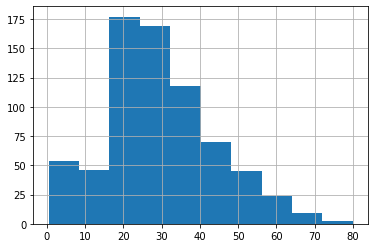

In [240]:
train_data.Age.hist()

In [241]:
train_data.Age = train_data.Age.to_frame().fillna(train_data.Age.mean())

In [242]:
train_data.Age.isnull().sum()

0

In [243]:
train_data.Age.describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot:>

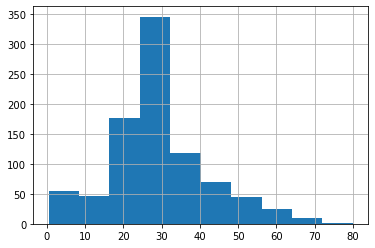

In [244]:
train_data.Age.hist()

### Cabin

In [245]:
train_data.Cabin.sample(5)

626    NaN
9      NaN
811    NaN
528    NaN
735    NaN
Name: Cabin, dtype: object

In [246]:
missing_cabins_percentage = train_data.Cabin.isna().sum() / train_data.Cabin.size * 100
print(f"Percentage of rows with missing cabin : {round(missing_cabins_percentage,1)}%")

Percentage of rows with missing cabin : 77.1%


We consider this percentage too high to be able to make an educated guess to fill NA, we'll drop this column.

In [247]:
train_data = train_data.drop(train_data.Cabin.name, axis=1)
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,S
1,1,1,female,38.000000,1,0,PC 17599,71.2833,C
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.000000,1,0,113803,53.1000,S
4,0,3,male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,211536,13.0000,S
887,1,1,female,19.000000,0,0,112053,30.0000,S
888,0,3,female,29.699118,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.000000,0,0,111369,30.0000,C


### Embarked

In [248]:
null_embarked = train_data.Embarked.isna().sum() / train_data.Embarked.size * 100
print(f"Embarked NA : {round(null_embarked,2)}%")

Embarked NA : 0.22%


<AxesSubplot:title={'center':'Embarked Distribution'}>

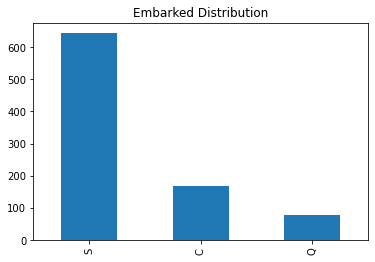

In [249]:
train_data.Embarked.value_counts().plot.bar(
    title="Embarked Distribution"
)

Since there is an imbalance in the data for this column and since thre is only a very small fraction of the rows that have missing values for this column, we will use the least popular value as fill value.

In [250]:
least_frequent_embarked_value = train_data.Embarked.value_counts().index[-1]
print(f"Least frequent Embarked value : {least_frequent_embarked_value}")

Least frequent Embarked value : Q


In [251]:
train_data[train_data.Embarked.name] = train_data[train_data.Embarked.name].fillna(least_frequent_embarked_value)
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,S
1,1,1,female,38.000000,1,0,PC 17599,71.2833,C
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.000000,1,0,113803,53.1000,S
4,0,3,male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,211536,13.0000,S
887,1,1,female,19.000000,0,0,112053,30.0000,S
888,0,3,female,29.699118,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.000000,0,0,111369,30.0000,C


In [252]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [257]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


# Exploratory Data Analysis (EDA)

## Basic Stats

In [258]:
train_stats = train_data.describe()
train_stats.loc['range'] = train_stats.loc['max'] - train_stats.loc['min']

out_fields = ['mean','25%','50%','75%', 'range']
train_stats = train_stats.loc[out_fields]
train_stats.rename({'50%': 'median'}, inplace=True)
train_stats

,Survived,Pclass,Age,SibSp,Parch,Fare
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
median,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
range,1.000000,2.000000,79.580000,8.000000,6.000000,512.329200


## Targets distribution

<AxesSubplot:title={'center':'Survival Distribution'}>

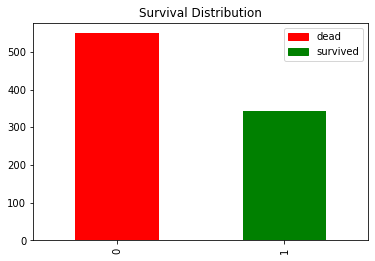

In [259]:
colors = {'dead':'red', 'survived':'green'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

train_data.Survived.value_counts().plot.bar(
    title="Survival Distribution",
    color=colors.values()
)

In [260]:
survival_rate = round(train_data.Survived.sum() / train_data.Survived.count() * 100, 1)

print(f"Survival rate is {survival_rate}%")

Survival rate is 38.4%


<AxesSubplot:title={'center':'Sex Distribution'}>

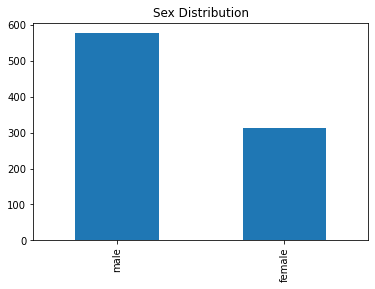

In [261]:
train_data.Sex.value_counts().plot.bar(
    title="Sex Distribution"
)

In [280]:
train_data.count()

Survived    891
Pclass      891
Sex         891
Age         891
SibSp       891
Parch       891
Ticket      891
Fare        891
Embarked    891
dtype: int64

In [283]:
number_of_male = (train_data['Sex'] == 'male').sum()
number_of_female = (train_data['Sex'] == 'female').sum()
number_of_passengers = number_of_male + number_of_female

print(f"Male : {round(number_of_male/number_of_passengers*100,2)}%")
print(f"Female : {round(number_of_female/number_of_passengers*100,2)}%")

Male : 64.76%
Female : 35.24%


## Feature Encoding

In [293]:
non_numerical_columns = train_data.dtypes[train_data.dtypes == object]
non_numerical_columns = non_numerical_columns.index.tolist()

train_data[non_numerical_columns].head()

,Sex,Ticket,Embarked
0,male,A/5 21171,S
1,female,PC 17599,C
2,female,STON/O2. 3101282,S
3,female,113803,S
4,male,373450,S


### One Hot Encoding

In [298]:
train_data = pd.get_dummies(train_data, columns=['Sex','Embarked'], drop_first=True)
train_data.sample(10)

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
834,0,3,18.000000,0,0,2223,8.3000,1,0,1
12,0,3,20.000000,0,0,A/5. 2151,8.0500,1,0,1
292,0,2,36.000000,0,0,SC/Paris 2163,12.8750,1,0,0
287,0,3,22.000000,0,0,349206,7.8958,1,0,1
121,0,3,29.699118,0,0,A4. 54510,8.0500,1,0,1
874,1,2,28.000000,1,0,P/PP 3381,24.0000,0,0,0
524,0,3,29.699118,0,0,2700,7.2292,1,0,0
298,1,1,29.699118,0,0,19988,30.5000,1,0,1
238,0,2,19.000000,0,0,28665,10.5000,1,0,1
217,0,2,42.000000,1,0,243847,27.0000,1,0,1


### Ordinal Encoding

In [306]:
ordinal_encoder = OrdinalEncoder()

train_data[['Ticket']] = ordinal_encoder.fit_transform(train_data[['Ticket']])

train_data

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,523.0,7.2500,1,0,1
1,1,1,38.000000,1,0,596.0,71.2833,0,0,0
2,1,3,26.000000,0,0,669.0,7.9250,0,0,1
3,1,1,35.000000,1,0,49.0,53.1000,0,0,1
4,0,3,35.000000,0,0,472.0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,101.0,13.0000,1,0,1
887,1,1,19.000000,0,0,14.0,30.0000,0,0,1
888,0,3,29.699118,1,2,675.0,23.4500,0,0,1
889,1,1,26.000000,0,0,8.0,30.0000,1,0,0


In [308]:
non_numerical_columns = train_data.dtypes[train_data.dtypes == object]
len(non_numerical_columns)

0

## Insights

<AxesSubplot:ylabel='Frequency'>

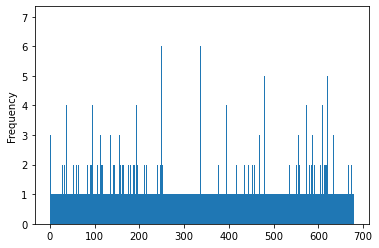

In [315]:
train_data.Ticket.plot.hist(bins=train_data.Ticket.nunique())

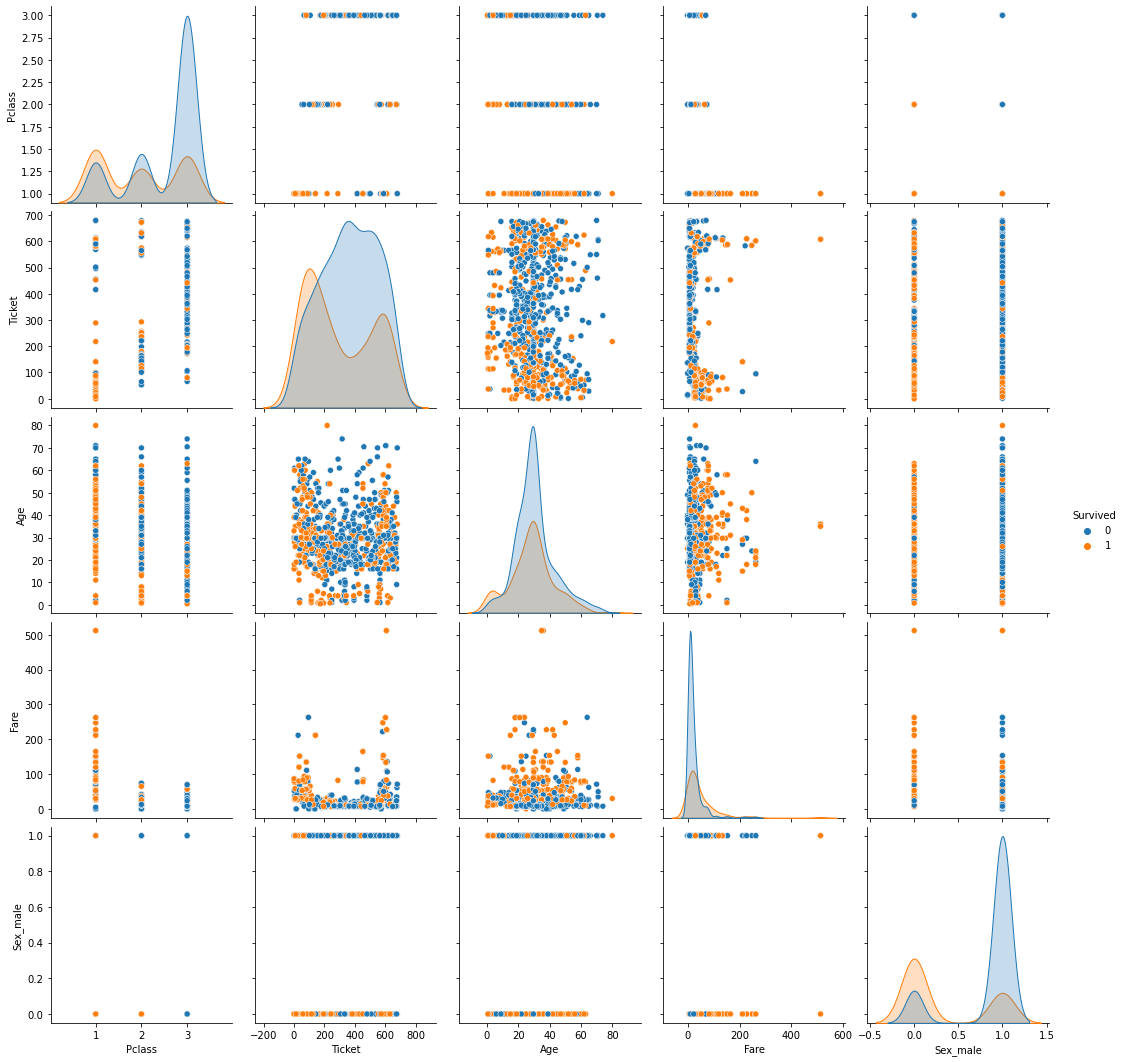

In [337]:
sns.pairplot(train_data, hue='Survived', height=3, vars=['Pclass', 'Ticket', 'Age', 'Fare', 'Sex_male'])

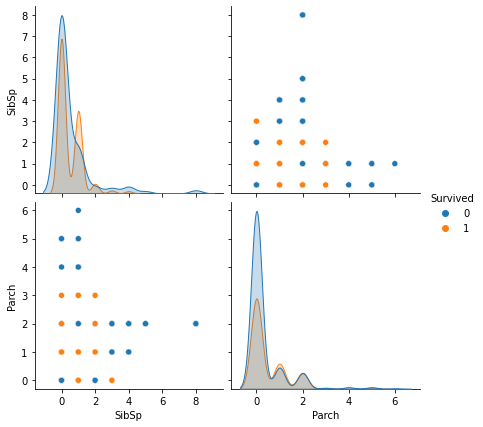

In [338]:
sns.pairplot(train_data, hue='Survived', height=3, vars=['SibSp', 'Parch'])